In [11]:
session_times <- read.csv(file="./train_data/web_page_data.csv")
session_times[,2] <- session_times[,2] * 100

In [12]:
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

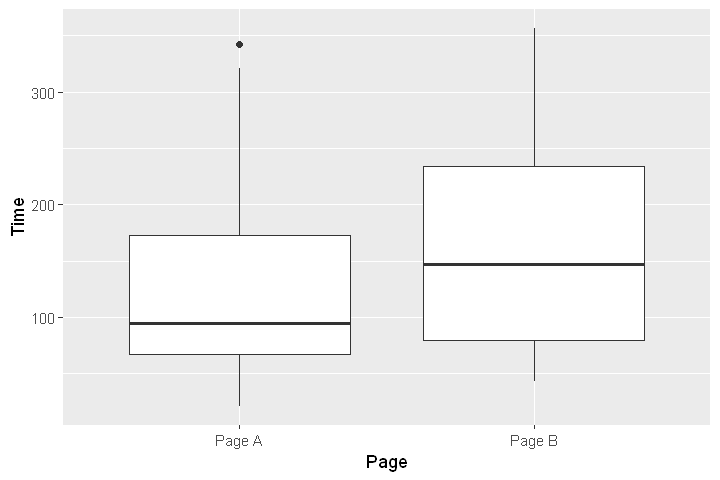

In [13]:
library(ggplot2)
ggplot(session_times, aes(x=Page, y=Time)) +
    geom_boxplot()

In [14]:
mean_a <- mean(session_times[session_times['Page'] == 'Page A', 'Time'])
mean_b <- mean(session_times[session_times['Page'] == 'Page B', 'Time'])
mean_b - mean_a

[1] 35.66667

In [15]:
perm_fun <- function(x, n1, n2){
    n <- n1 + n2
    idx_b <- sample(1:n, n1)
    idx_a <- setdiff(1:n, idx_b)
    mean_diff <- mean(x[idx_b]) - mean(x[idx_a])
    return(mean_diff)
}

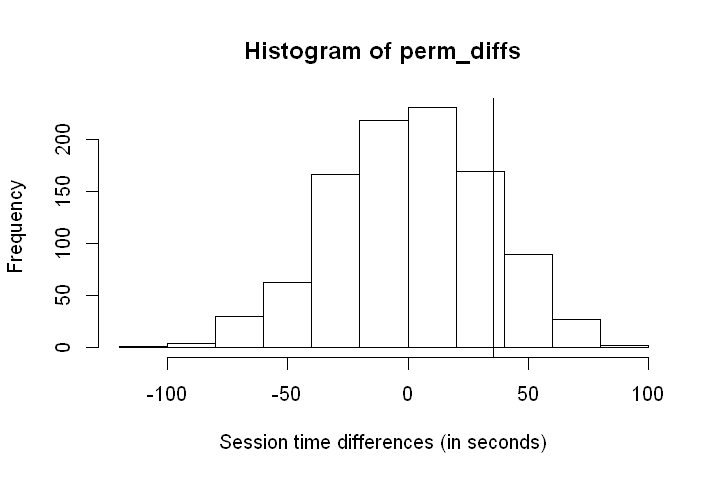

In [16]:
perm_diffs <- rep(0, 1000)
for(i in 1:1000)
    perm_diffs[i] = perm_fun(session_times[, 'Time'], 21, 15)
hist(perm_diffs, xlab='Session time differences (in seconds)')
abline(v = mean_b - mean_a)

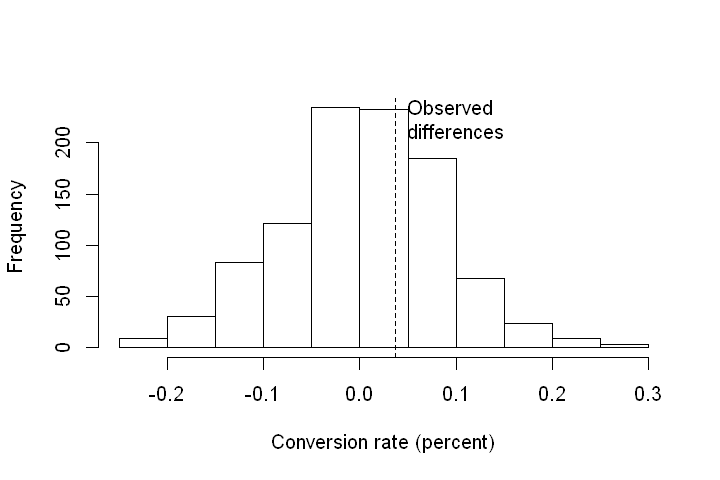

In [20]:
obs_pct_diff <- 100 * (200 / 23739 - 182/22588)
conversion <- c(rep(0, 45945), rep(1, 382))
perm_diffs <- rep(0, 1000)
for(i in 1:1000)
    perm_diffs[i] = 100 * perm_fun(conversion, 23739, 22588)
hist(perm_diffs, xlab='Conversion rate (percent)', main='')
abline(v=obs_pct_diff, lty=2, lwd=1.5)
text("  Observed\n  differences", x=obs_pct_diff, y=par()$usr[4]-20, adj=0)

In [22]:
mean(perm_diffs > obs_pct_diff)

[1] 0.33

In [24]:
prop.test(x=c(200, 182), n=c(23739, 22588), alternative="greater")


	2-sample test for equality of proportions with continuity correction

data:  c(200, 182) out of c(23739, 22588)
X-squared = 0.14893, df = 1, p-value = 0.3498
alternative hypothesis: greater
95 percent confidence interval:
 -0.001057439  1.000000000
sample estimates:
     prop 1      prop 2 
0.008424955 0.008057376 


In [25]:
t.test(Time ~ Page, data=session_times, alternatvie='less')


	Welch Two Sample t-test

data:  Time by Page
t = -1.0983, df = 27.693, p-value = 0.2815
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -102.21978   30.88644
sample estimates:
mean in group Page A mean in group Page B 
            126.3333             162.0000 
